Требуется
Разработать модуль spider для получения данных с веб-приложений в формализованном виде
Подготовить датасет и произвести его анализ

# 1. Разработка модуля spider для получения данных с веб-приложений в формализованном виде

Установка необходимых библиотек и создание jobs

In [1]:
# Устанавливает библиотеку Scrapy с помощью pip (менеджера пакетов Python)
!pip install scrapy

# Создает новый проект Scrapy с именем "jobs" (создаст папку с базовой структурой проекта)
!scrapy startproject jobs

# Переходит в директорию проекта "jobs" (команда для Jupyter Notebook/IPython)
%cd jobs

# Генерирует нового паука (spider) с именем "example" для домена example.com
# (Это шаблонный код, который нужно будет адаптировать под реальный сайт)
!scrapy genspider example example.com

# Дважды переходит в поддиректорию jobs (вероятно, опечатка или избыточная команда)
%cd jobs

# Переходит в поддиректорию spiders (где хранятся файлы пауков)
%cd spiders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.7/321.7 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 6.7 MB/s eta 0:00:00
New Scrapy project 'jobs', using template directory '/usr/local/lib/python3.11/dist-packages/scrapy/templates/project', created in:
    /content/jobs

You can start your first spider with:
    cd jobs
    scrapy genspider example example.com
/content/jobs
Created spider 'example' using template 'basic' in module:
  jobs.spiders.example
/content/jobs/jobs
/content/jobs/jobs/spiders


Запись кода для `spider` в файл `jobs.py`

In [2]:
with open('jobs.py', 'w') as f:
    f.write("""
import scrapy

class jobs(scrapy.Spider):
    name = 'jobs'
    start_urls = ['https://pixelpeople.fandom.com/wiki/Professions']

    def parse(self, response):
        A = {}
        table = response.css('table.wikitable.sortable')[0]
        rows = table.css('tbody tr')[1:]
        for row in rows:
            cells = row.css('td')
            title = cells[0].css('::text').get().strip()
            craft_1 = cells[1].css('::text').get().strip()
            craft_2 = cells[2].css('::text').get().strip()
            A[title] = {'craft': [craft_1, craft_2]}

        yield A
""")

Запуск `spider` для извлечения данных

In [5]:
!scrapy crawl jobs -o jobs.json

2025-06-25 16:19:40 [scrapy.utils.log] INFO: Scrapy 2.13.2 started (bot: jobs)
2025-06-25 16:19:40 [scrapy.utils.log] INFO: Versions:
{'lxml': '5.4.0',
 'libxml2': '2.13.8',
 'cssselect': '1.3.0',
 'parsel': '1.10.0',
 'w3lib': '2.3.1',
 'Twisted': '25.5.0',
 'Python': '3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]',
 'pyOpenSSL': '24.2.1 (OpenSSL 3.3.2 3 Sep 2024)',
 'cryptography': '43.0.3',
 'Platform': 'Linux-6.1.123+-x86_64-with-glibc2.35'}
2025-06-25 16:19:40 [scrapy.addons] INFO: Enabled addons:
[]
2025-06-25 16:19:40 [asyncio] DEBUG: Using selector: EpollSelector
2025-06-25 16:19:40 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2025-06-25 16:19:40 [scrapy.utils.log] DEBUG: Using asyncio event loop: asyncio.unix_events._UnixSelectorEventLoop
2025-06-25 16:19:40 [scrapy.extensions.telnet] INFO: Telnet Password: 3a508b8865a85f7d
2025-06-25 16:19:40 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.Cor

# 2. Подготовка датасета и его анализ

In [6]:
# Импортируем библиотеку pandas под псевдонимом pd для работы с данными в табличном формате
import pandas as pd

# Импортируем модуль json для работы с JSON-данными
import json

# Открываем файл 'jobs.json' в режиме чтения ('r') и загружаем его содержимое
with open('jobs.json', 'r') as file:
    # Загружаем JSON-данные из файла в переменную data
    data = json.load(file)

# Создаем DataFrame (таблицу данных) с помощью pandas:
df = pd.DataFrame([{'Профессия': key,
                    'Элемент для крафта 1': value['craft'][0],
                    'Элемент для крафта 2': value['craft'][1]}
                   for key, value in data[0].items()])

# Выводим полученный DataFrame на экран (в Jupyter Notebook он отобразится как красивая таблица)
df

,Профессия,Элемент для крафта 1,Элемент для крафта 2
0,Mayor,None,None
1,Mechanic,None,None
2,Engineer,Mayor,Mechanic
3,Sheriff,Mayor,Mayor
4,Architect,Mayor,Engineer
...,...,...,...
445,Glacier,Confiseur,Jack Frost
446,Crooner,Wedding Singer,Blues Guitarist
447,Improv Drummer,Drummer,Virtuoso
448,Blues Guitarist,Guitarist,Improv Drummer


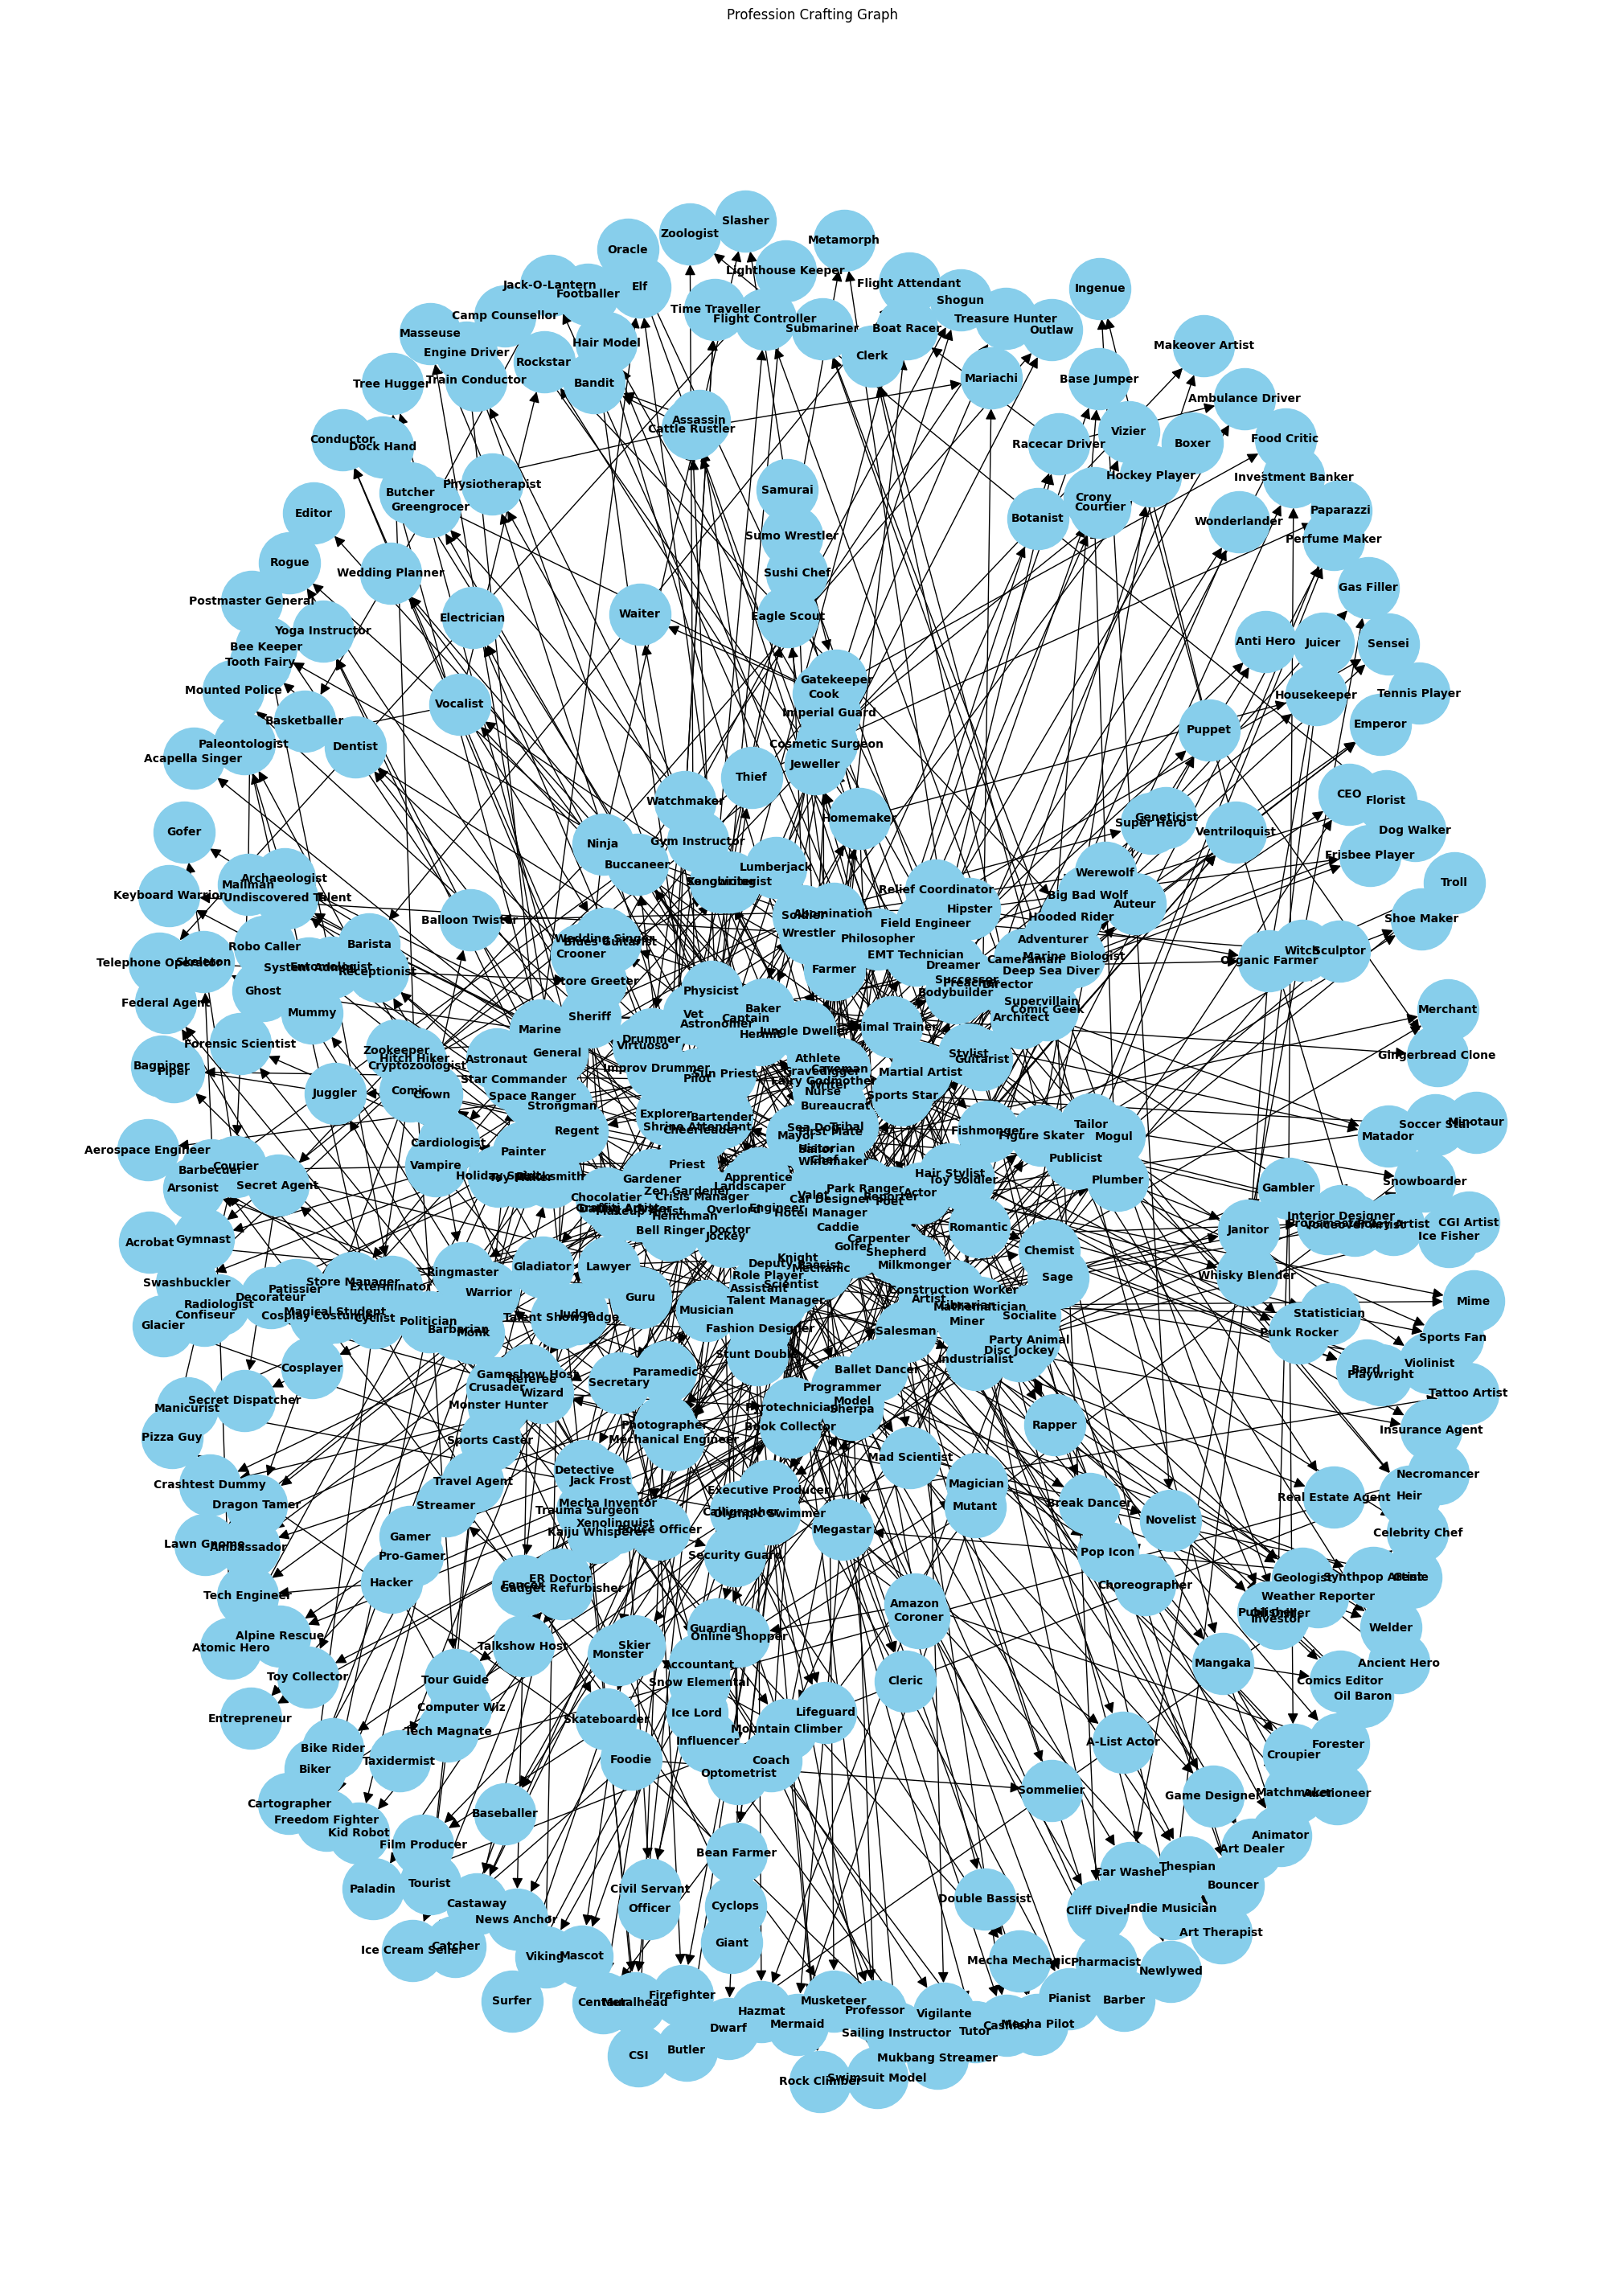

In [8]:
# Импортируем библиотеку NetworkX под псевдонимом nx для работы с графами
import networkx as nx
# Импортируем matplotlib.pyplot под псевдонимом plt для визуализации графа
import matplotlib.pyplot as plt

# Создаем ориентированный граф (DiGraph) для отображения зависимостей крафта
G = nx.DiGraph()

# Проходим по каждому элементу в данных (профессии и их компоненты для крафта)
for child, parents in data[0].items():
    # Добавляем профессию (child) как узел графа
    G.add_node(child)
    # Проходим по каждому компоненту крафта (родительскому элементу)
    for parent in parents['craft']:
        # Пропускаем компоненты со значением 'None'
        if parent != 'None':
            # Добавляем компонент крафта как узел графа
            G.add_node(parent)
            # Добавляем направленное ребро от компонента к профессии
            G.add_edge(parent, child)

# Создаем фигуру для отрисовки графа с указанными размерами (20x28 дюймов)
plt.figure(figsize=(20, 28))
# Вычисляем позиции узлов с помощью spring-алгоритма (Fruchterman-Reingold)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue",
        font_size=10, font_weight="bold", arrowsize=20)
# Добавляем заголовок графа
plt.title('Profession Crafting Graph')
# Отображаем граф
plt.show()

In [ ]:
G = nx.DiGraph()

# Добавляем вершины и ребра в граф
for index, row in df.iterrows():
    child = row['Профессия']
    parent_1 = row['Элемент для крафта 1']
    parent_2 = row['Элемент для крафта 2']
    G.add_node(child)
    if parent_1 != 'None':
        G.add_node(parent_1)
        G.add_edge(parent_1, child)
    if parent_2 != 'None':
        G.add_node(parent_2)
        G.add_edge(parent_2, child)

# Находим стартовые вершины (вершины, из которых ничего не крафтится)
start_nodes = [node for node in G.nodes() if G.in_degree(node) == 0]

# Отрисовываем граф
plt.figure(figsize=(200, 100))
pos = nx.spring_layout(G)  # Определяем способ расположения узлов
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", arrowsize=20)
plt.title('Crafting Graph')
plt.show()

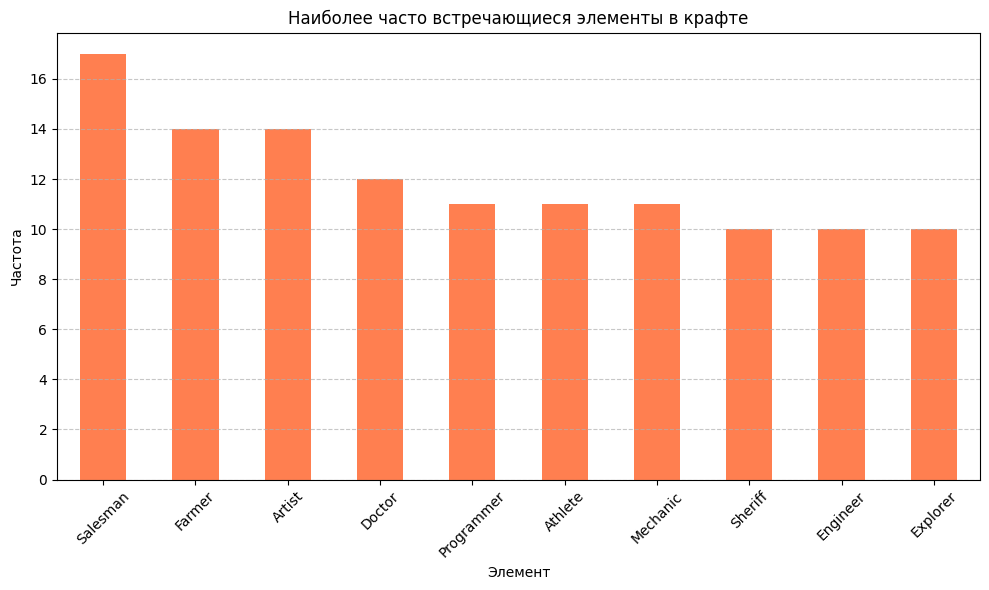

In [9]:
top_parents = pd.concat([df['Элемент для крафта 1'], df['Элемент для крафта 2']]).value_counts().head(10)

# Строим график
plt.figure(figsize=(10, 6))
top_parents.plot(kind='bar', color='coral')
plt.title('Наиболее часто встречающиеся элементы в крафте')
plt.xlabel('Элемент')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Для удобной визуализации графа отрисуем его в Mermaid. Но для этого, нужно преобразовать датафрейм df в синтаксис Mermaid.

In [10]:
mermaid_graph = 'graph TD;\n'

# Проходим по каждой строке DataFrame
for index, row in df.iterrows():
    child = row['Профессия']
    parent_1 = row['Элемент для крафта 1']
    parent_2 = row['Элемент для крафта 2']

    # Добавляем связи между родителями и ребенком
    if parent_1 != 'None':
        mermaid_graph += f'    {parent_1}-->{child};\n'
    if parent_2 != 'None':
        mermaid_graph += f'    {parent_2}-->{child};\n'

# Записываем строку в файл
with open('graph.mmd', 'w') as file:
    file.write(mermaid_graph)

Полученный код (фрагмент)

In [11]:
graph TD
    Mayor-->Engineer;
    Mechanic --> Engineer;
    Mayor --> Sheriff;
    Mayor --> Sheriff;
    Mayor --> Architect;
    Engineer --> Architect;
    Assistant --> Landscaper;
    Architect --> Landscaper;
    Assistant --> Deputy;
    Sheriff --> Deputy;
    Landscaper --> Gardener;
    Deputy --> Gardener;
    Mechanic --> Mechanical_Engineer;
    Engineer --> Mechanical_Engineer;
    Farmer --> Botanist;
    Farmer --> Botanist;

SyntaxError: invalid syntax (ipython-input-11-1279615361.py, line 1)

Парсинг БЕЗ помощи scrapy. Сделан с помощью bs4.

In [12]:
# Импортируем библиотеку requests для выполнения HTTP-запросов
import requests
# Импортируем BeautifulSoup из bs4 для парсинга HTML
from bs4 import BeautifulSoup

# Создаем пустой словарь A для хранения данных о профессиях
A = {}

# URL страницы с профессиями в вики PixelPeople
url = 'https://pixelpeople.fandom.com/wiki/Professions'

# Выполняем GET-запрос к указанному URL и сохраняем ответ в переменную r
r = requests.get(url)

# Создаем объект BeautifulSoup для парсинга HTML-контента, используя парсер lxml
soup = BeautifulSoup(r.text, 'lxml')

# Находим первую таблицу с классом 'wikitable sortable', получаем её тело (tbody) и все строки (tr)
a = soup.find_all('table', class_='wikitable sortable')[0].find('tbody').find_all('tr')

# Итерируемся по строкам таблицы, начиная со второй (первая - заголовки)
for _ in a[1:]:
    # Получаем все ячейки (td) в текущей строке
    aaa = _.find_all('td')

    # Добавляем в словарь A запись, где:
    # Ключ - название профессии (текст первой ячейки, очищенный от переносов строк)
    # Значение - словарь с ключом 'craft' и списком компонентов крафта (текст 2-й и 3-й ячеек)
    A[aaa[0].text.replace('\n', '')] = {
        'craft': [
            aaa[1].text.replace('\n', ''),
            aaa[2].text.replace('\n', '')
        ]
    }

# Выводим полученный словарь A
print(A)

{'Mayor': {'craft': ['None', 'None']}, 'Mechanic': {'craft': ['None', 'None']}, 'Engineer': {'craft': ['Mayor', 'Mechanic']}, 'Sheriff': {'craft': ['Mayor', 'Mayor']}, 'Architect': {'craft': ['Mayor', 'Engineer']}, 'Landscaper': {'craft': ['Assistant', 'Architect']}, 'Deputy': {'craft': ['Assistant', 'Sheriff']}, 'Gardener': {'craft': ['Landscaper', 'Deputy']}, 'Mechanical Engineer': {'craft': ['Mechanic', 'Engineer']}, 'Botanist': {'craft': ['Farmer', 'Farmer']}, 'Park Ranger': {'craft': ['Sheriff', 'Landscaper']}, 'Firefighter': {'craft': ['Mechanic', 'Police Officer']}, 'Farmer': {'craft': ['Engineer', 'Gardener']}, 'Doctor': {'craft': ['Engineer', 'Nurse']}, 'Nurse': {'craft': ['Homemaker', 'Gardener']}, 'Police Officer': {'craft': ['Sheriff', 'Sheriff']}, 'Vet': {'craft': ['Park Ranger', 'Doctor']}, 'Homemaker': {'craft': ['Farmer', 'Gardener']}, 'Zoologist': {'craft': ['Botanist', 'Vet']}, 'Plumber': {'craft': ['Engineer', 'Assistant']}, 'Fishmonger': {'craft': ['Farmer', 'Plumbe